# Comparando Redes Convolucionales con Fully Conected en set de datos MNIST


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from IPython.display import display, Markdown

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Lectura de datos
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Normalizando las imágenes con valores entre 0.0 y 1.0
def normalize(ds):
  return (ds/255).astype('float')

X_train = normalize(X_train)
X_test = normalize(X_test)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Función para graficar resultados
def acc_loss_plot(history, epochs, title, plot_size=(20, 20)):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.figure(figsize=plot_size)

  ax_1 = plt.subplot(2,2,1)
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title(f'Accuracy Modelo {title}\nacc: {round(acc[-1], 3)}, val_acc: {round(val_acc[-1], 3)}', fontsize=15)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['ACC', 'VAL_ACC'], loc='lower right')
  plt.grid(True)
  plt.xticks(range(0,epochs))

  ax_2 = plt.subplot(2,2,2)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title(f'Loss Modelo {title}\nloss: {round(loss[-1], 3)}, , val_loss: {round(val_loss[-1], 3)}', fontsize=15)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['LOSS', 'VAL_LOSS'], loc='lower left')
  plt.grid(True)
  plt.xticks(range(0,epochs))
  plt.show()

In [ ]:
# Función para generar reporte de classificación y matriz de confusión
def report(predictions, real):
  print('\n')
  predictions = np.argmax(predictions, axis=1)
  matrix = confusion_matrix(real, predictions)
  plt.figure(figsize=(15, 15))
  sns.heatmap(matrix.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='g')
  plt.title('Matrix de Confusión')
  plt.xlabel('Predicciones')
  plt.ylabel('Etiquetas')
  plt.show()
  print('\n', classification_report(real, predictions))

### Repitiendo el modelo Fully Conected para comparar los datos con modelos convolucionales

In [ ]:
# EarlyStopping callback
es_callback = EarlyStopping(monitor='val_loss',
                            mode='min', min_delta=0.005, 
                            patience=4, verbose=True) 
epochs = 45
# Modelo fully conected
model = Sequential()
model.add(Flatten(input_shape=(28,28, 1)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2()))
model.add(Dense(128, activation='relu', kernel_regularizer=l2()))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/45
469/469 [==============================] - 5s 5ms/step - loss: 1.1402 - accuracy: 0.8848 - val_loss: 0.5785 - val_accuracy: 0.9162
Epoch 2/45
469/469 [==============================] - 2s 3ms/step - loss: 0.5261 - accuracy: 0.9236 - val_loss: 0.4866 - val_accuracy: 0.9277
Epoch 3/45
469/469 [==============================] - 1s 3ms/step - loss: 0.4624 - accuracy: 0.9325 - val_loss: 0.4382 - val_accuracy: 0.9398
Epoch 4/45
469/469 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.9395 - val_loss: 0.4045 - val_accuracy: 0.9391
Epoch 5/45
469/469 [==============================] - 1s 3ms/step - loss: 0.3968 - accuracy: 0.9430 - val_loss: 0.3778 - val_accuracy: 0.9473
Epoch 6/45
469/469 [==============================] - 1s 3ms/step - loss: 0.3747 - accuracy: 0.9464 - val_loss: 0.3625 - val_accuracy: 0.9484
Epoch 7/45
469/469 [==============================] - 1s 3ms/step - loss: 0.3591 - accuracy: 0.9482 - val_loss: 0.3413 - val_accuracy: 0.9510
Epoch 

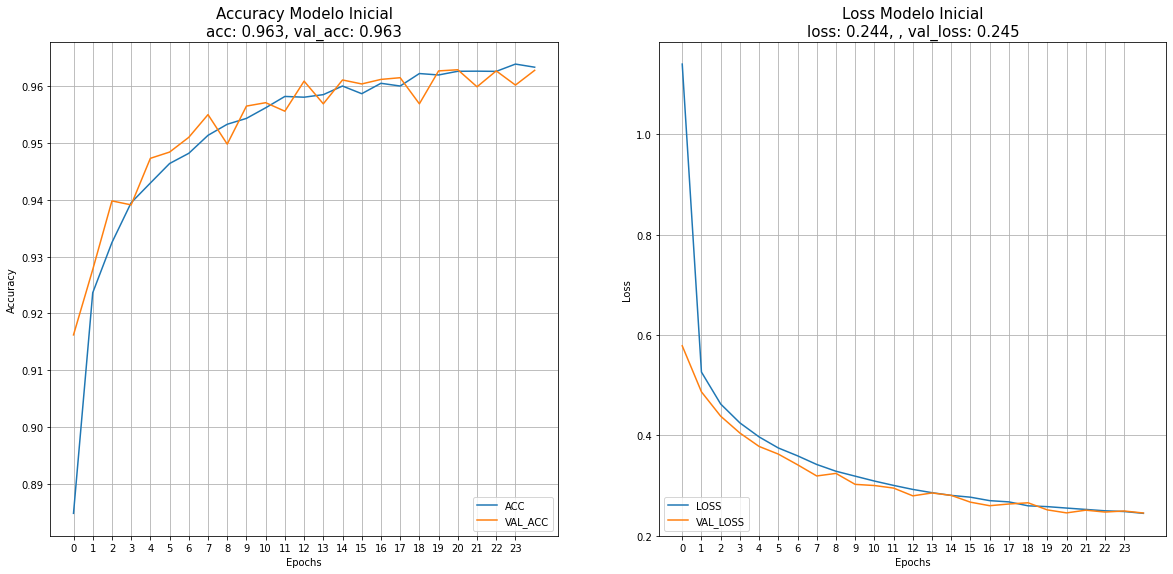

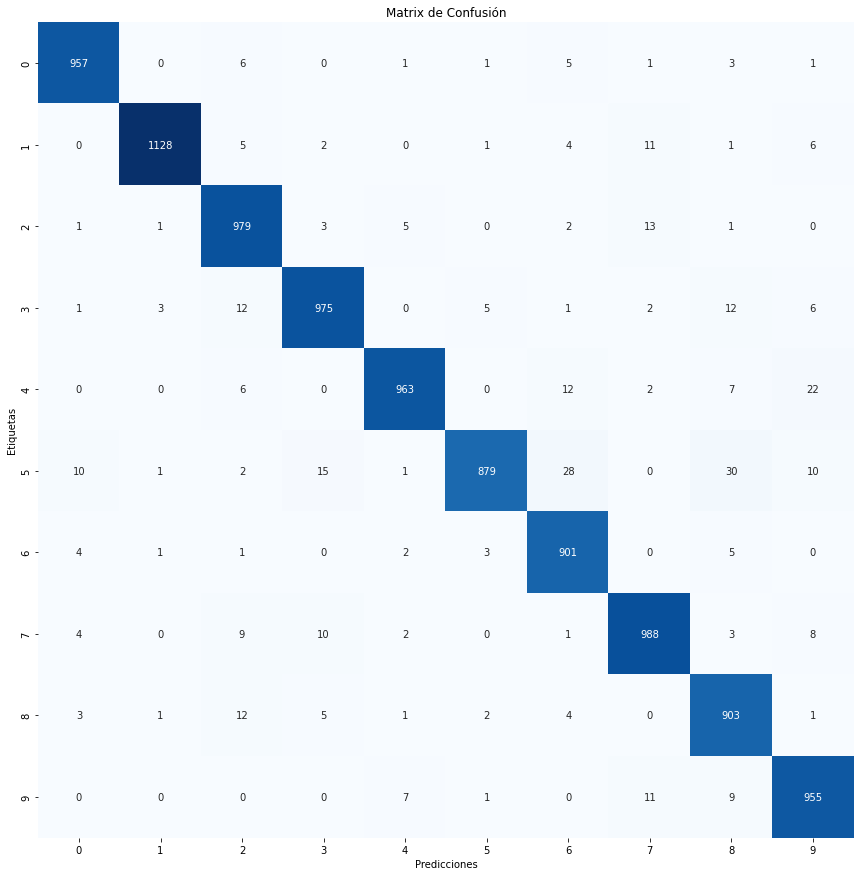


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.95      0.98      0.97       982
           5       0.90      0.99      0.94       892
           6       0.98      0.94      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.93      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
history = model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=epochs,
    validation_data=(X_test, Y_test),
    shuffle=True,
    callbacks=[es_callback],
    verbose=True)

last_epoch = es_callback.stopped_epoch if es_callback.stopped_epoch != 0 else epochs
acc_loss_plot(history, last_epoch, 'Inicial')
report(model.predict(X_test), Y_test)

Resultados obtenidos con MLP:


**N° Capas:** 2 (ocultas)

**N° Neuronas por capa:** 128

**N° Épocas:** 27 (por earlystopping)

**Regularizador:** L2

**Optimizador:** Adam(0.001)

---

$$
\begin{aligned}
& \hspace{80mm} \text { Mejor resultado con MLP }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador} & \text { Función de salida } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 2 capas } & \text{27 épocas} & \text{128} & \text{L2} & \text{Adam} & \text{Sotfmax} & \text{0.961} & \text{0.246}\\
\hline
\end{array}
\end{aligned}
$$



In [ ]:
init_conv_model = Sequential(layers=[
      Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)),
      Conv2D(60, (3,3), activation='relu'),
      Flatten(),
      Dense(40, activation='relu'),
      Dense(10, activation='softmax')
])

init_conv_model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

init_conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        17340     
                                                                 
 flatten_1 (Flatten)         (None, 34560)             0         
                                                                 
 dense_3 (Dense)             (None, 40)                1382440   
                                                                 
 dense_4 (Dense)             (None, 10)                410       
                                                                 
Total params: 1,400,510
Trainable params: 1,400,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
469/469 [==============================] - 13s 9ms/step - loss: 0.1644 - accuracy: 0.9513 - val_loss: 0.0575 - val_accuracy: 0.9817
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0420 - val_accuracy: 0.9859
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0380 - val_accuracy: 0.9878
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0433 - val_accuracy: 0.9867
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.0427 - val_accuracy: 0.9878
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0430 - val_accuracy: 0.9889
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0531 - val_accuracy: 0.9857
Epoch

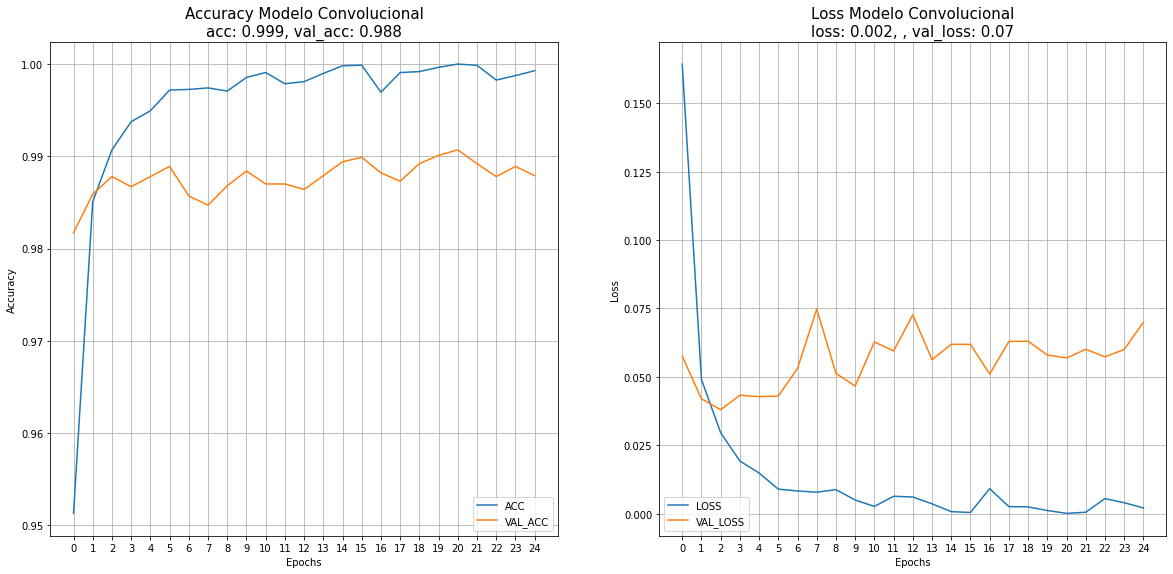

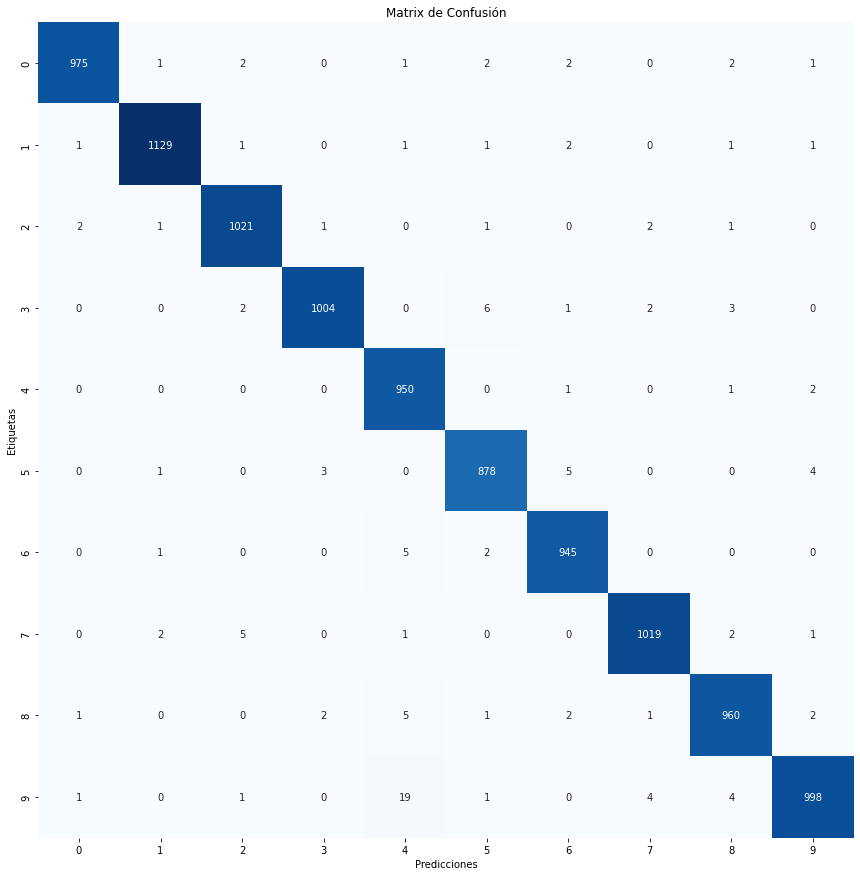


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
epochs = 25

history = init_conv_model.fit(
    X_train, Y_train, epochs=epochs,
    batch_size=128,
    validation_data=(X_test, Y_test)
)
acc_loss_plot(history, epochs, 'Convolucional')
report(init_conv_model.predict(X_test), Y_test)

$$
\begin{aligned}
& \hspace{30mm} \text {Primer resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { N° neuronas } & \text {  N° épocas  } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text { 40 } & \text{15 } & \text{0.98} & \text{0.051} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



In [ ]:
# Agregando Regularización en la última capa oculta para evitar el overfitting

init_conv_model_2 = Sequential(layers=[
      Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)),
      Conv2D(60, (3,3), activation='relu'),
      Flatten(),
      Dense(40, activation='relu', kernel_regularizer=l2()),
      Dense(10, activation='softmax')
])

init_conv_model_2.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

init_conv_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 60)        17340     
                                                                 
 flatten_3 (Flatten)         (None, 34560)             0         
                                                                 
 dense_7 (Dense)             (None, 40)                1382440   
                                                                 
 dense_8 (Dense)             (None, 10)                410       
                                                                 
Total params: 1,400,510
Trainable params: 1,400,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
469/469 [==============================] - 5s 9ms/step - loss: 0.4024 - accuracy: 0.9331 - val_loss: 0.2537 - val_accuracy: 0.9602
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2387 - accuracy: 0.9622 - val_loss: 0.2095 - val_accuracy: 0.9644
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2073 - accuracy: 0.9675 - val_loss: 0.1821 - val_accuracy: 0.9743
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1871 - accuracy: 0.9703 - val_loss: 0.1635 - val_accuracy: 0.9753
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1725 - accuracy: 0.9729 - val_loss: 0.1550 - val_accuracy: 0.9762
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1629 - accuracy: 0.9745 - val_loss: 0.1565 - val_accuracy: 0.9758
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1543 - accuracy: 0.9754 - val_loss: 0.1462 - val_accuracy: 0.9776
Epoch 

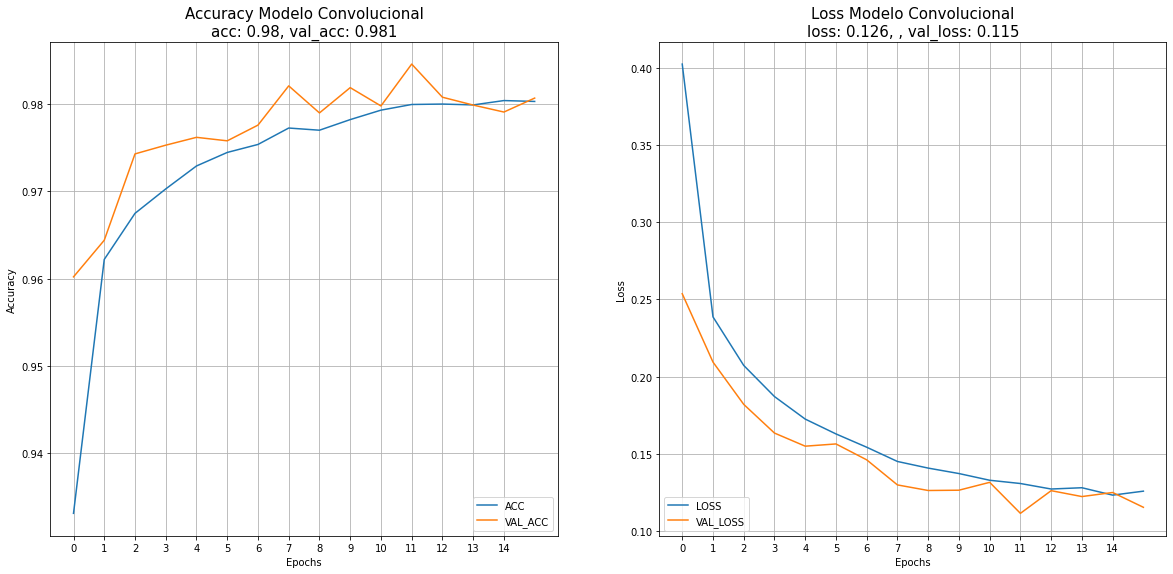

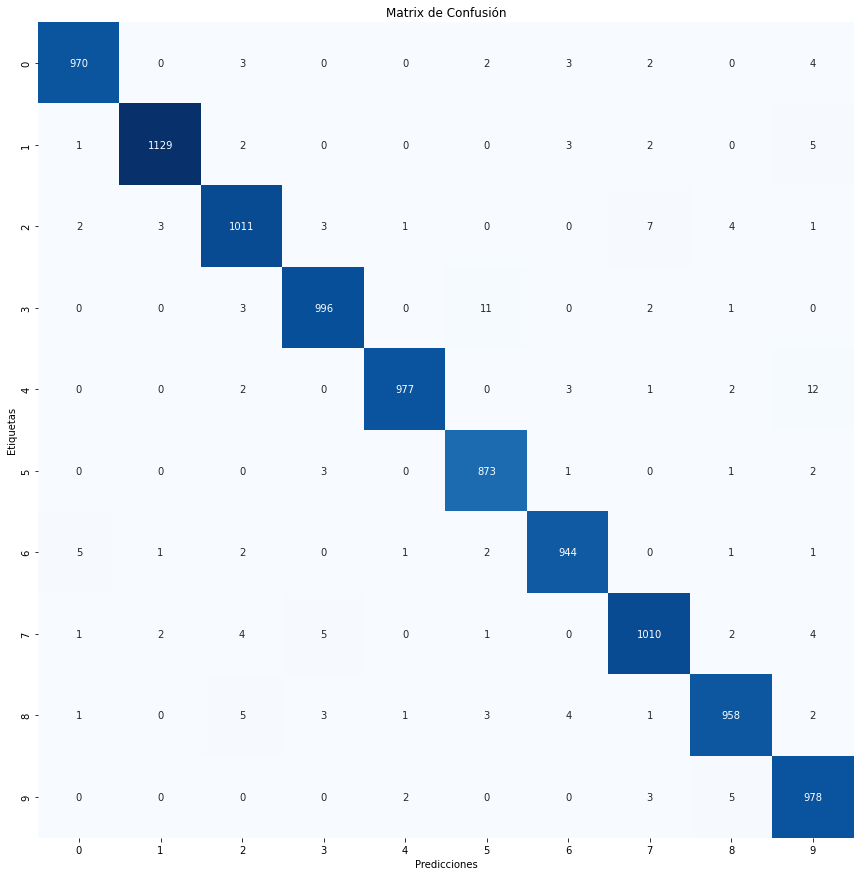


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
epochs = 25
# EarlyStopping callback
es_callback = EarlyStopping(monitor='val_loss',
                            mode='min', min_delta=0.005, 
                            patience=4, verbose=True,
                            restore_best_weights=True) 
history = init_conv_model_2.fit(
    X_train, Y_train, epochs=epochs,
    batch_size=128,
    validation_data=(X_test, Y_test),
    callbacks=[es_callback]
)

last_epoch = es_callback.stopped_epoch if es_callback.stopped_epoch != 0 else epochs
acc_loss_plot(history, last_epoch, 'Convolucional')
report(init_conv_model_2.predict(X_test), Y_test)

$$
\begin{aligned}
& \hspace{30mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { N° neuronas } & \text {  N° épocas  } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text { 40 neuronas por capa} & \text{15 épocas} & \text{0.975} & \text{0.134} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$

#### *Nota: Si bien los valores de accuracy y loss son mejores en el primer modelo convolucional, en el gráfico se puede notar que empiza a experimentar overfitting, es por eso que considero que este último modelo, a pesar de no llegar a los mismos valores, está generalizando mejor*


## Redes Convolucionales con más hiperparámetros



La función a continuación va a generar los modelos convolucionales donde se experimenta con diferentes combinaciones de parámetros. Si quiere que no demore tanto la ejecución puede cambiar la variable "epochs" que está dentro de la función.

In [ ]:
def conv_model_generator(kernel_size, padding, stride):
    model = Sequential(layers=[
          Conv2D(32, (kernel_size, kernel_size), activation='relu', input_shape=(28,28, 1)),
          Conv2D(60, (kernel_size, kernel_size), activation='relu', padding=padding, strides=stride),
          MaxPool2D((2, 2)),
          Flatten(),
          Dense(40, activation='relu', kernel_regularizer=l2()),
          Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(0.001),
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy'],
    )

    epochs = 20
    # EarlyStopping callback
    es_callback = EarlyStopping(monitor='val_loss',
                                mode='min', min_delta=0.002, 
                                patience=5, verbose=False) 
    history = model.fit(
        X_train, Y_train, epochs=epochs,
        batch_size=128,
        validation_data=(X_test, Y_test),
        callbacks=[es_callback],
        verbose=False
    )

    last_epoch = es_callback.stopped_epoch if es_callback.stopped_epoch != 0 else epochs
    acc_loss_plot(history, last_epoch, 'Convolucional')
    report(model.predict(X_test), Y_test)
    return history.history

#### Experimentando con diferentes valores de tamaño del kernel, padding y stride
Dejé fijo en Nº de kernels y el tamaño y tipo de pooling, además de no experimentar con demasiados valores para que no tomara tanto tiempo al probar todas las posibles combinaciones.
Al final de todas las ejecuciones se muestra cual combinación de parametros es la que obtiene el mejor resultado.

### Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: (3x3),  Padding: same,  Polling: MaxPooling 2x2,  Stride: 1

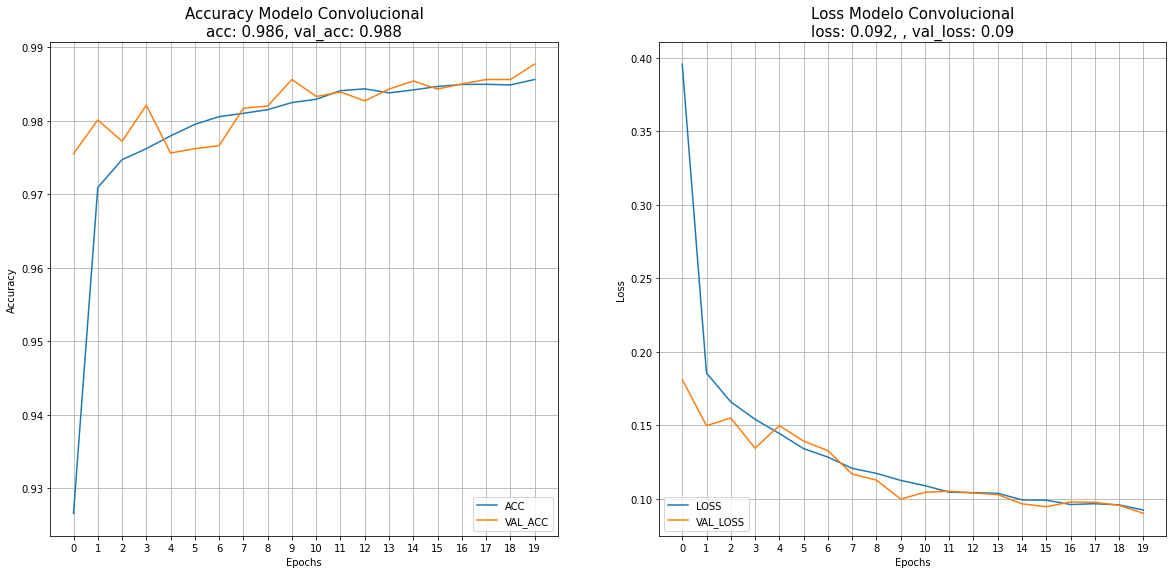

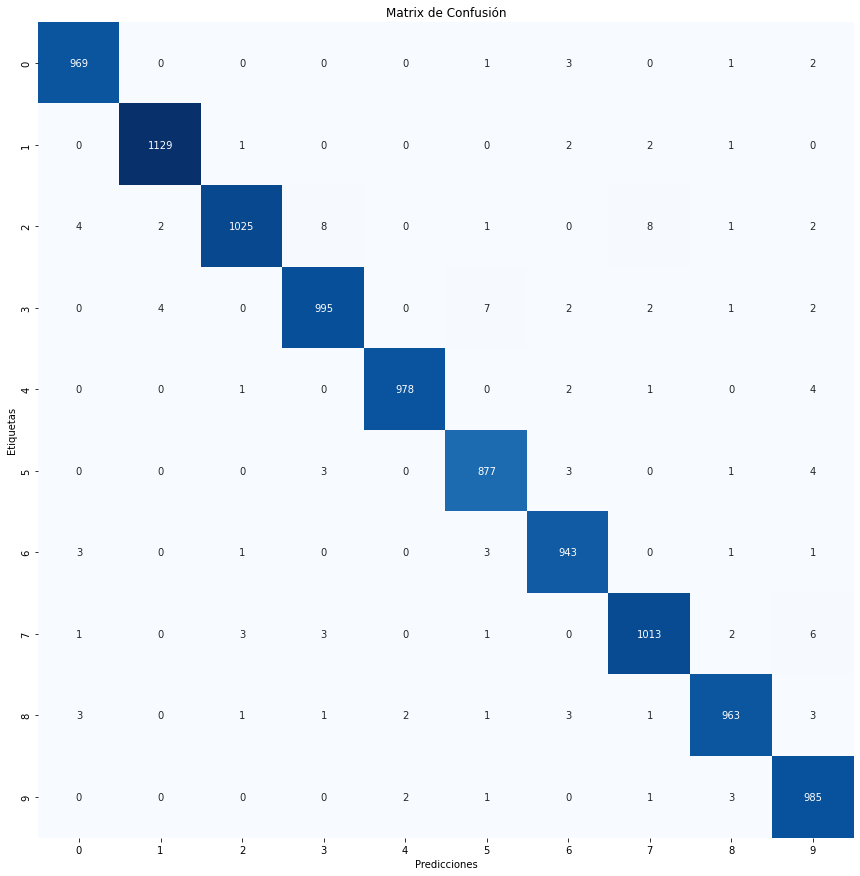


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: (3x3),  Padding: same,  Polling: MaxPooling 2x2,  Stride: 2

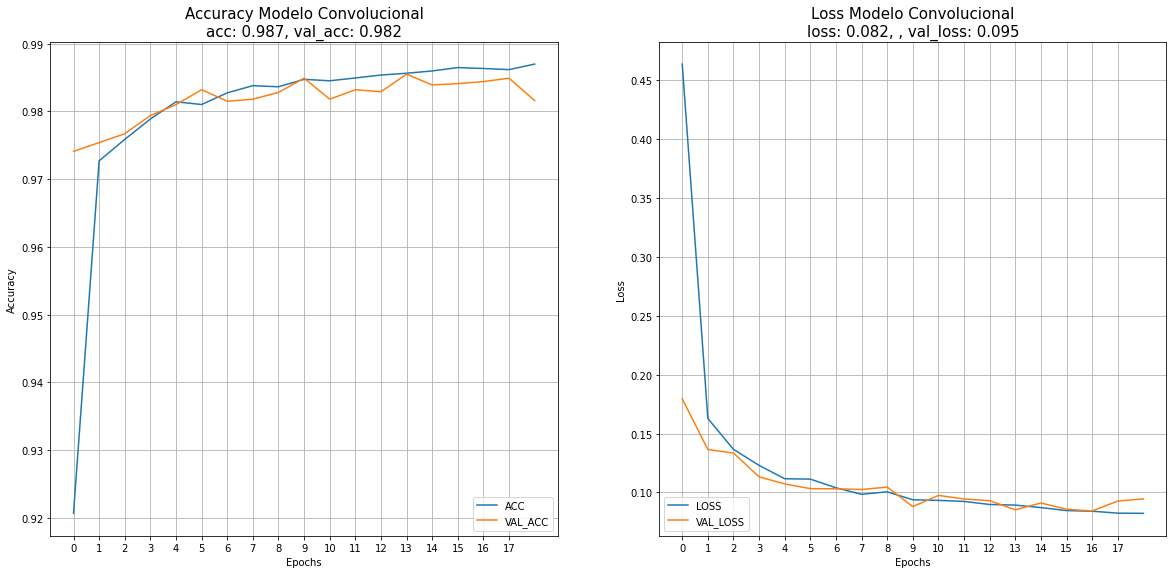

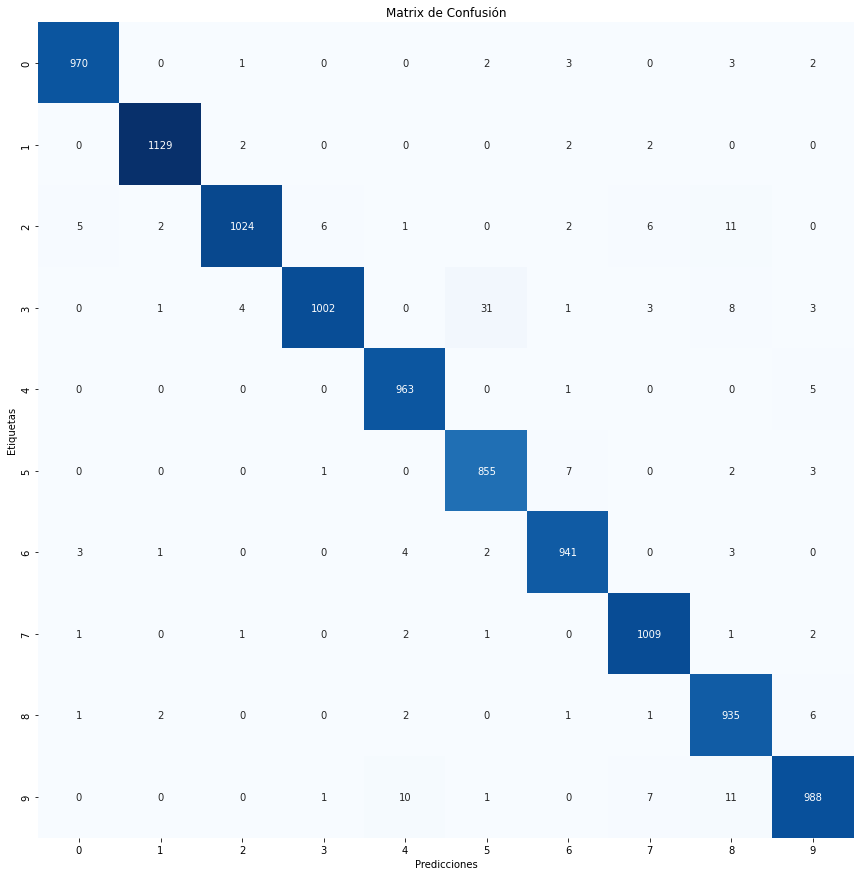


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: (3x3),  Padding: valid,  Polling: MaxPooling 2x2,  Stride: 1

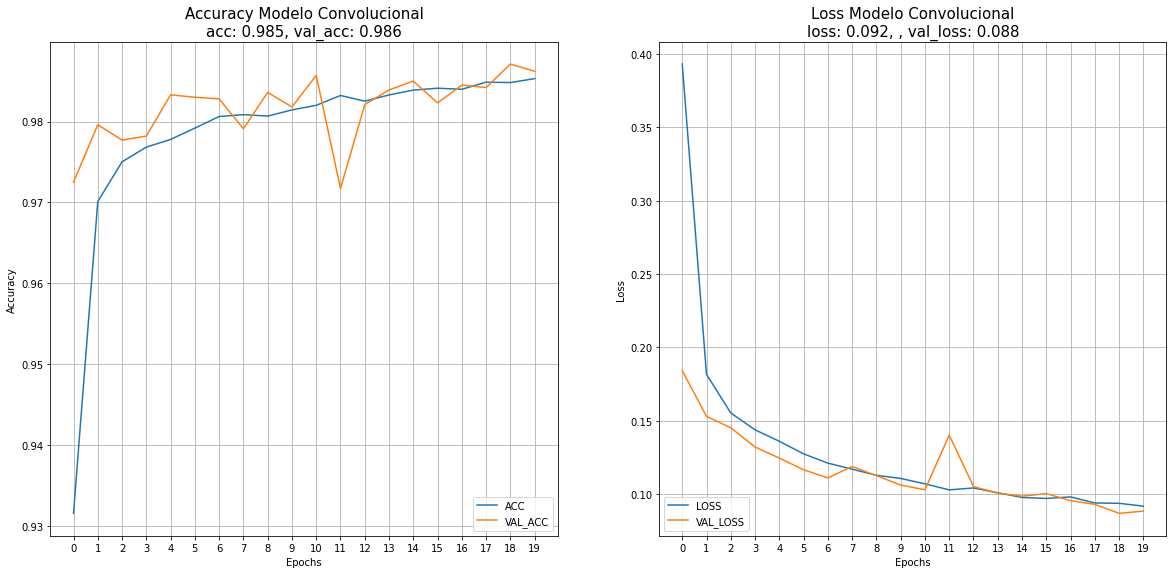

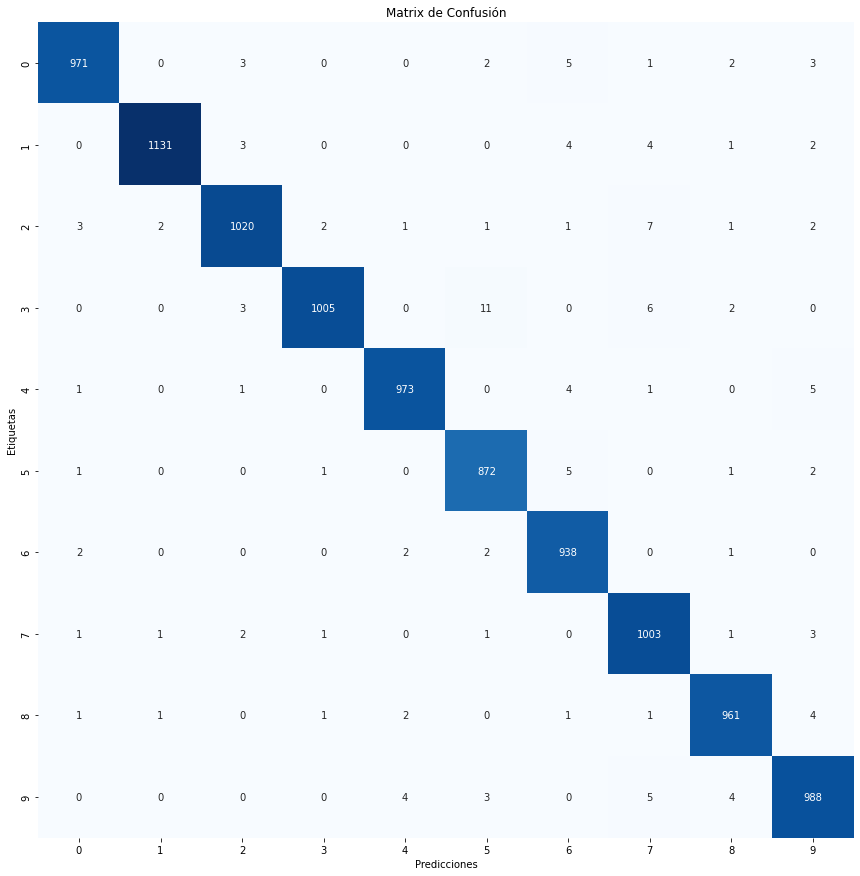


               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: (3x3),  Padding: valid,  Polling: MaxPooling 2x2,  Stride: 2

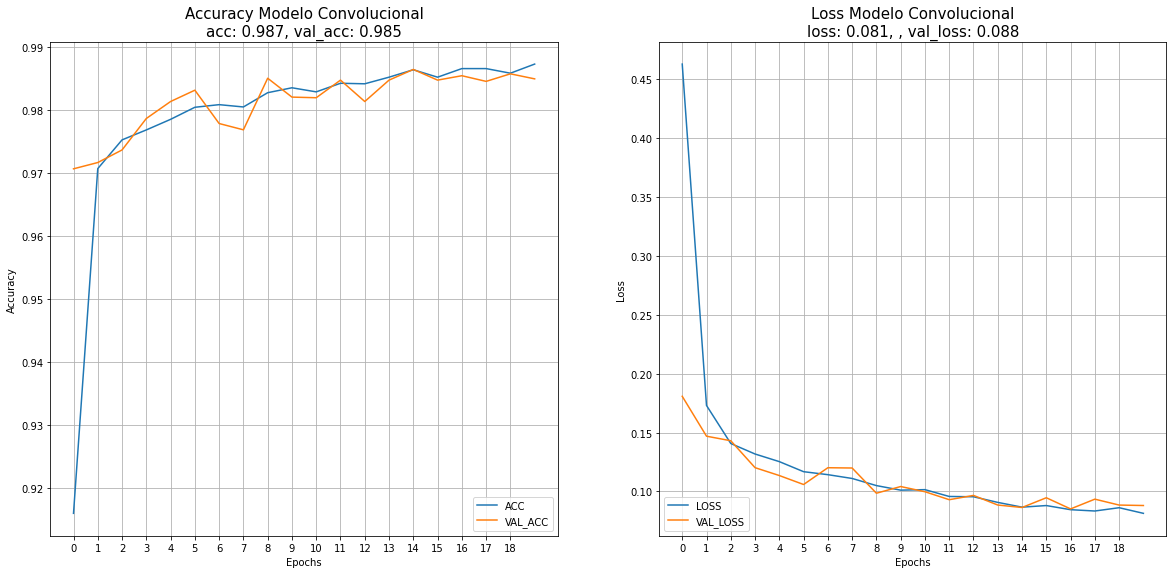

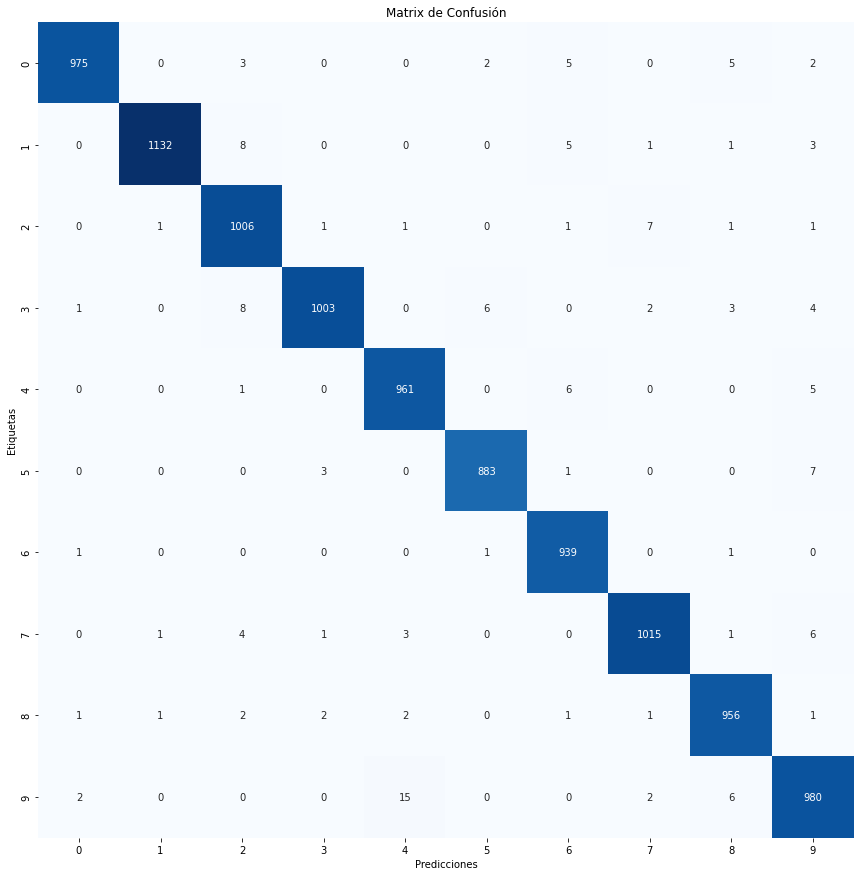


               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



### Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: (5x5),  Padding: same,  Polling: MaxPooling 2x2,  Stride: 1

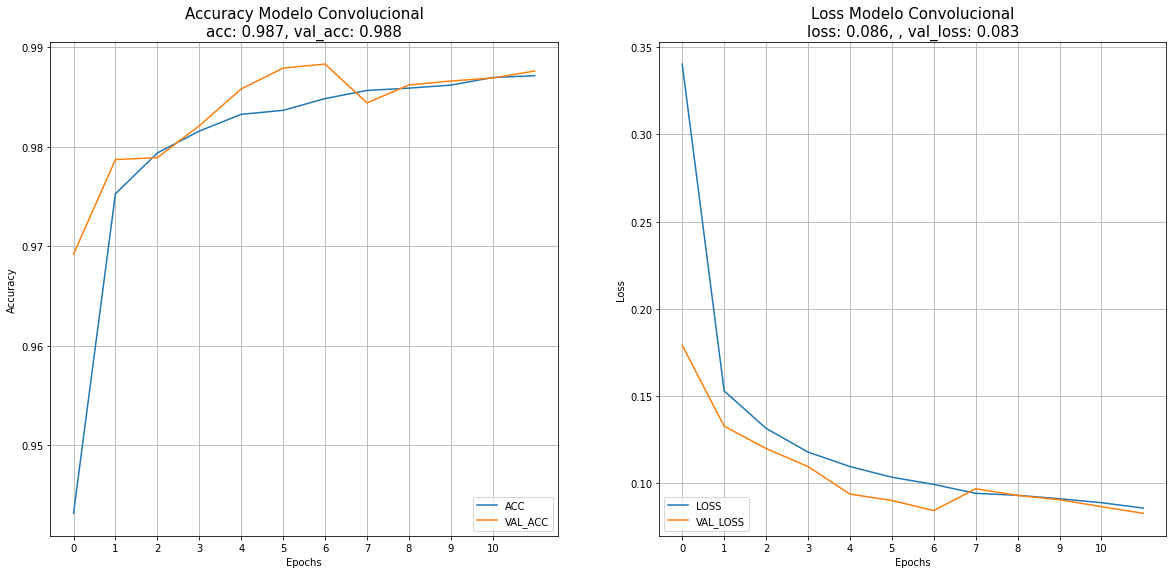

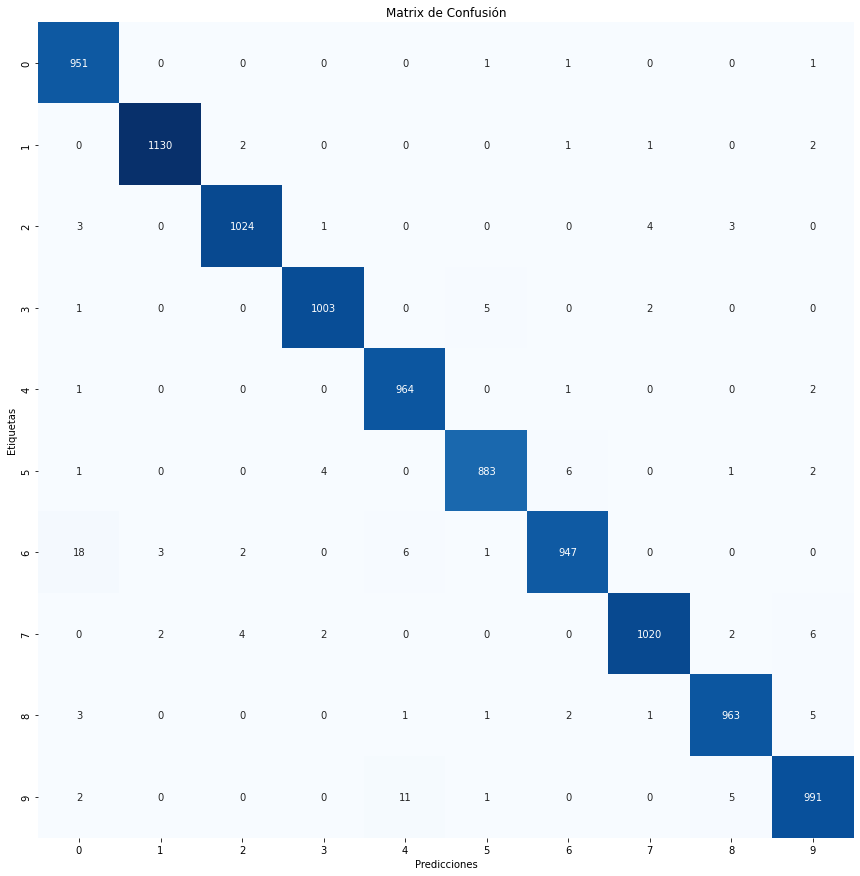


               precision    recall  f1-score   support

           0       1.00      0.97      0.98       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.97      0.99      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: (5x5),  Padding: same,  Polling: MaxPooling 2x2,  Stride: 2

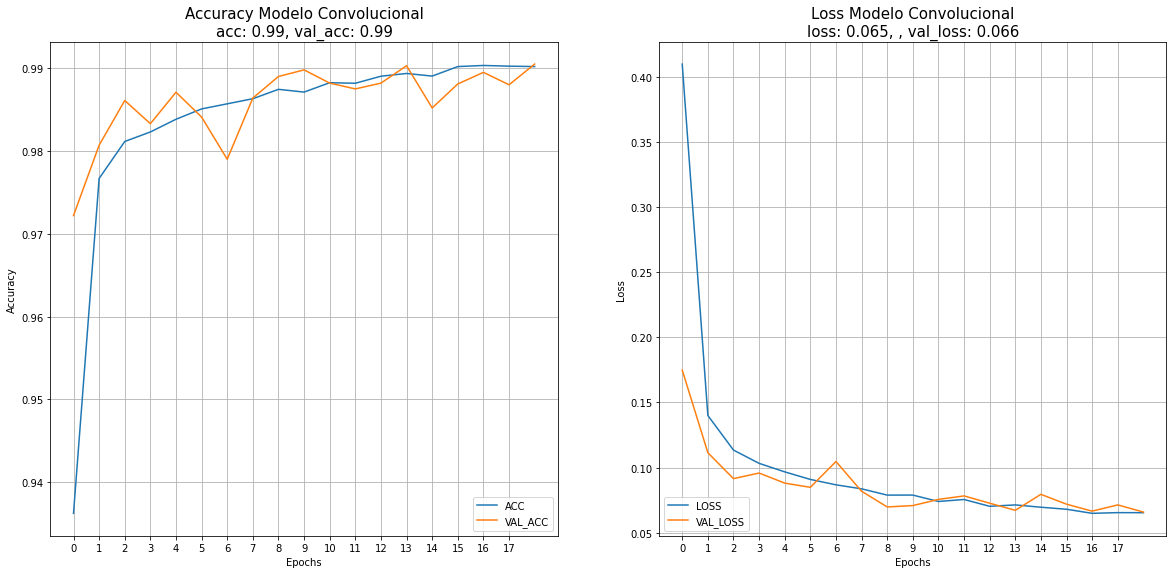

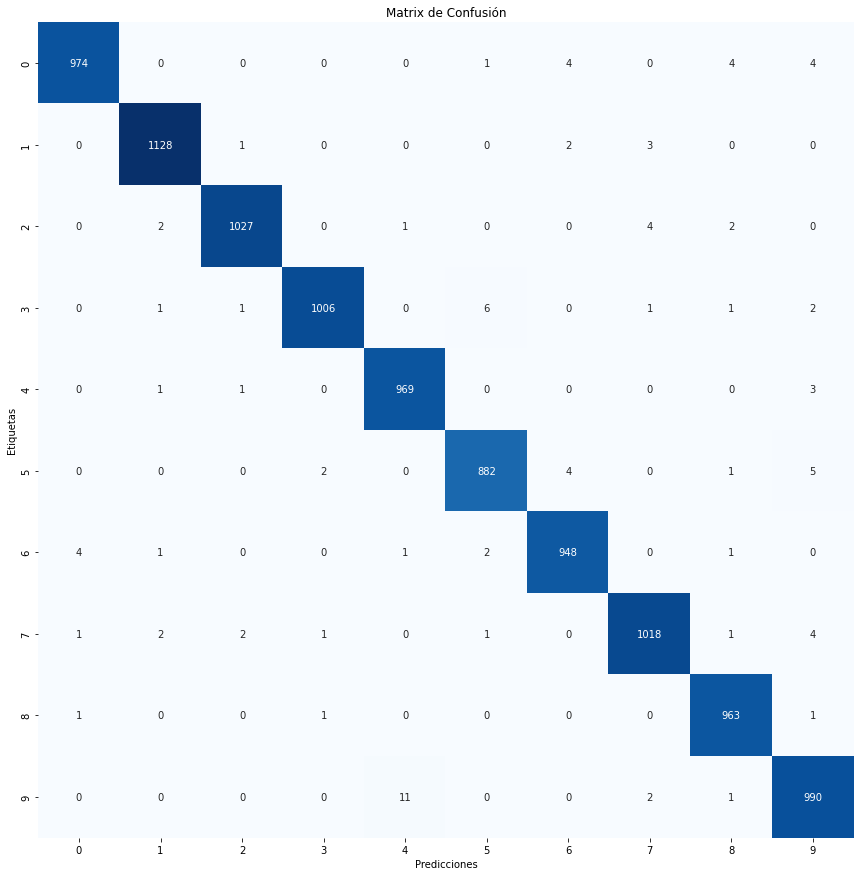


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: (5x5),  Padding: valid,  Polling: MaxPooling 2x2,  Stride: 1

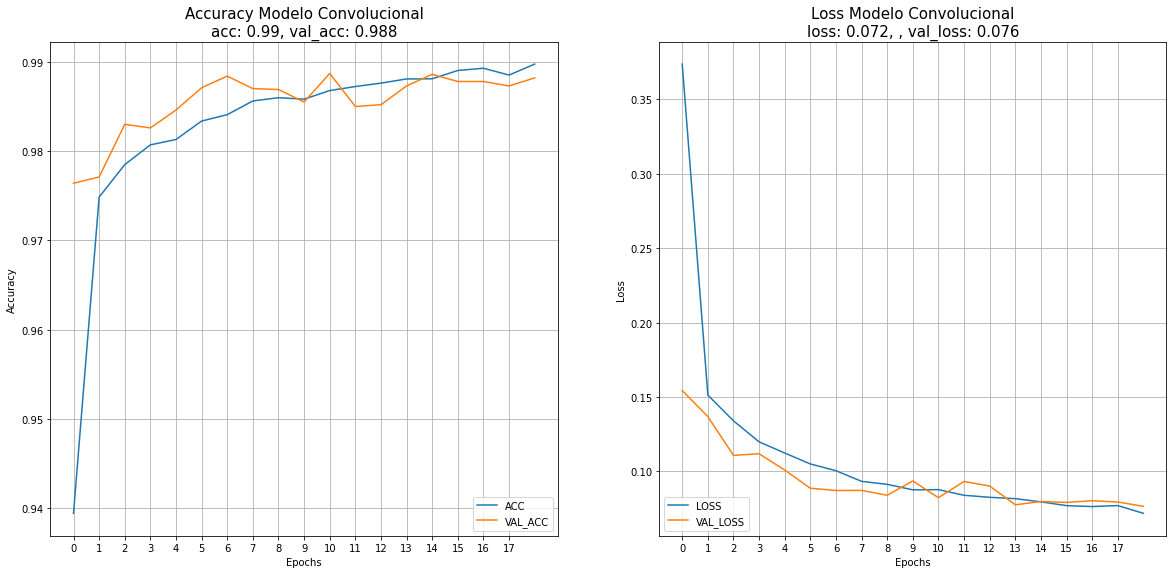

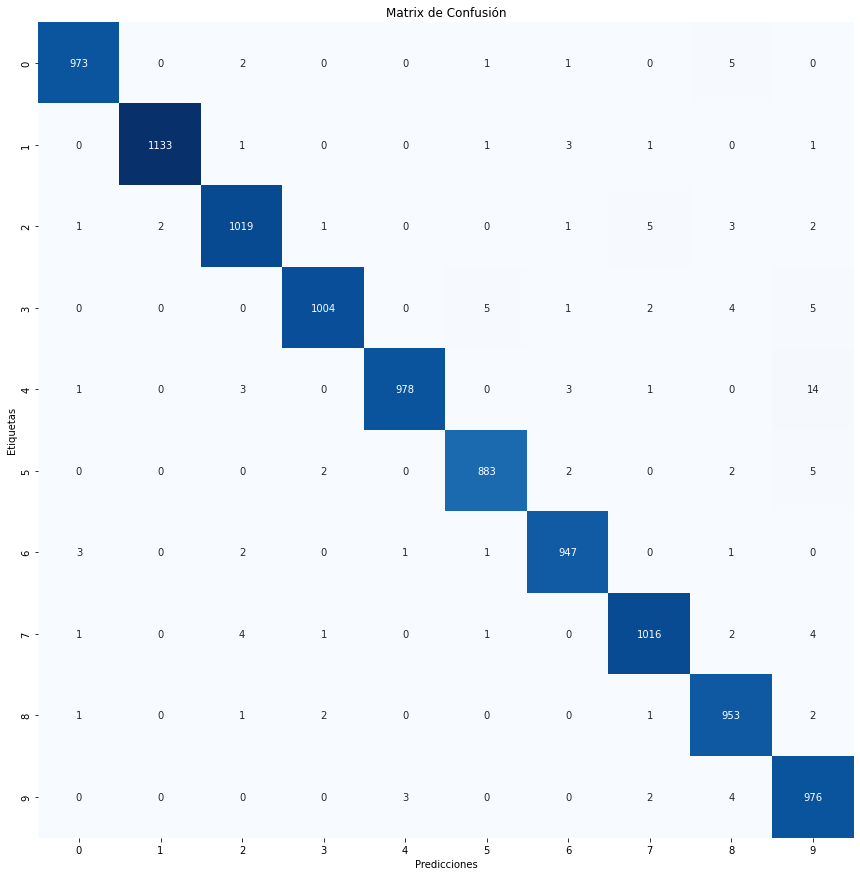


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: (5x5),  Padding: valid,  Polling: MaxPooling 2x2,  Stride: 2

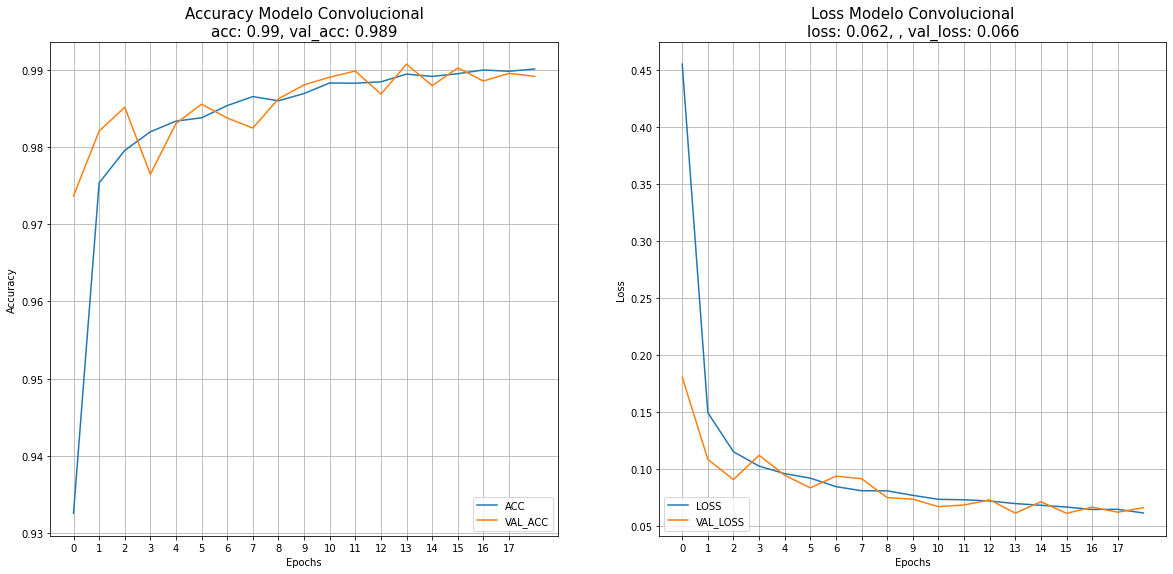

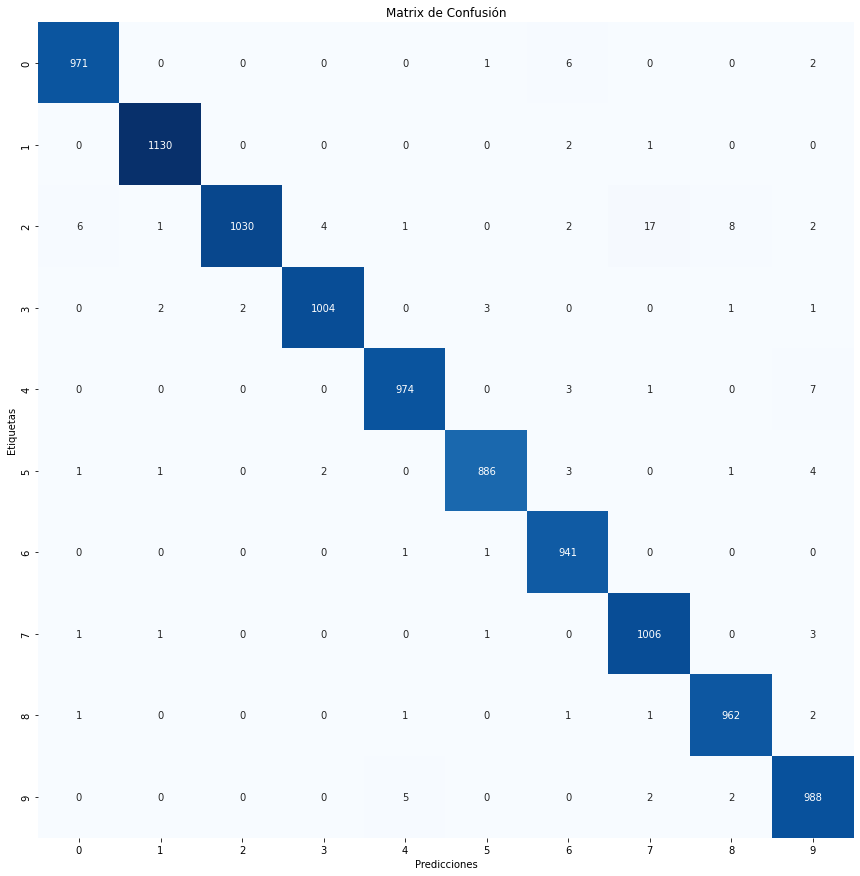


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.96      1.00      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Registros generales de los modelos
(kernel, padding, stride)
(3, 'same', 1) [0.9876999855041504, 0.0900377407670021]
(kernel, padding, stride)
(3, 'same', 2) [0.9815999865531921, 0.09451619535684586]
(kernel, padding, stride)
(3, 'valid', 

### Mejores Parámetros: Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: 5,  Padding: same,  Polling: MaxPooling 2x2,  Stride: 2

In [ ]:
kernel_size = [3, 5]
padding = ['same', 'valid']
stride = [1, 2]

combinations = list(product(*[kernel_size, padding, stride]))
best_model_params = ()
record = {}
accuracy = 0
loss = 10

# Se recorren las combinaciones de parámetros y se obtiene la mejor combinación
for i in combinations:
  display(Markdown(f'### Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: ({i[0]}x{i[0]}),  Padding: {i[1]},  Polling: MaxPooling 2x2,  Stride: {i[2]}'))
  history = conv_model_generator(i[0], i[1], i[2])
  val_accuracy = history['val_accuracy'][-1]
  val_loss = history['val_loss'][-1]
  record[i] = [val_accuracy, val_loss]
  if val_accuracy > accuracy and val_loss < loss:
    accuracy = val_accuracy
    loss = val_loss
    best_model_params = i

print('Registros generales de los modelos')
for key, values in record.items():
  print('(kernel, padding, stride)')
  print(key, values)

display(Markdown(f'### Mejores Parámetros: Nº Kernel: 1ª Capa Conv 32,  2ª Capa Conv 60,  Tamaño Kernel: {best_model_params[0]},  Padding: {best_model_params[1]},  Polling: MaxPooling 2x2,  Stride: {best_model_params[2]}'))

*Nota: Registré como primer resultado el primer modelo generado en el loop anterior*

$$
\begin{aligned}
& \hspace{80mm} \text { Primer resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text { 40 neuronas por capa} & \text{25 épocas} & \text{60} & \text{3x3} & \text{same} & \text{MaxPooling 2x2} & \text{2} & \text{0.987} & \text{0.090}\\
\hline
\end{array}
\end{aligned}
$$



$$
\begin{aligned}
& \hspace{80mm} \text {Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text { 40 neuronas por capa} & \text{25 épocas} & \text{60} & \text{5x5} & \text{same} & \text{MaxPooling(2x2)} & \text{2} & \text{0.99} & \text{0.065}\\
\hline
\end{array}
\end{aligned}
$$



## Análisis de resultados

* La cantidad de filtros lo seleccioné principalmente guiado por otros modelos de ejemplo, investigando cuales son los parametros y tamaños ocupados en general y guiado por el ejemplo del video de apoyo. Finalmente se busca, con prueba y error, encontrar un número que se adapte a la dificultad del problema evitando usar excesivos recursos en caso de no ser necesarios. En este caso el problema no es muy complejo, por lo que no es necesario un número excesivo de filtros. Lo que si es importante es que el tamaño sea de un número impar.